In [2]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
mpl.style.use('bmh')

In [5]:
nueva_ruta = 'C:\\Users\\Usuario\\Desktop\\DATASCIENCE\\DataSets'
os.chdir(nueva_ruta)

df_salud = pd.read_csv("saludfumadores.csv",sep = ';')

In [6]:
#Mostrando los primeros cinco resultados
#print(df_salud.head())

In [7]:
#Verificando cantidad de nulos
nulos = df_salud.isnull().sum()
#print(nulos)

In [5]:
#Resumen estadistico
print(df_salud.describe())

                age        height        weight     waistline    sight_left  \
count  79999.000000  79999.000000  79999.000000  79999.000000  79999.000000   
mean      47.590782    162.248091     63.269291     81.233798      0.981844   
std       14.179667      9.276408     12.532689     12.042157      0.612793   
min       20.000000    130.000000     30.000000     35.000000      0.100000   
25%       35.000000    155.000000     55.000000     74.000000      0.700000   
50%       45.000000    160.000000     60.000000     81.000000      1.000000   
75%       60.000000    170.000000     70.000000     87.800000      1.200000   
max       85.000000    190.000000    140.000000    999.000000      9.900000   

        sight_right     hear_left    hear_right           SBP           DBP  \
count  79999.000000  79999.000000  79999.000000  79999.000000  79999.000000   
mean       0.981060      1.031425      1.030500    122.386317     76.037713   
std        0.615506      0.174466      0.171961    

In [8]:
# Definimos los ejes que quiero graficar 
x = df_salud['SMK_stat_type_cd']
y = df_salud['DRK_YN']
# print(x,y)

FUMADORES;  1 (nunca), 2 (solía fumar pero lo dejó), 3 (todavía fuma)

<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

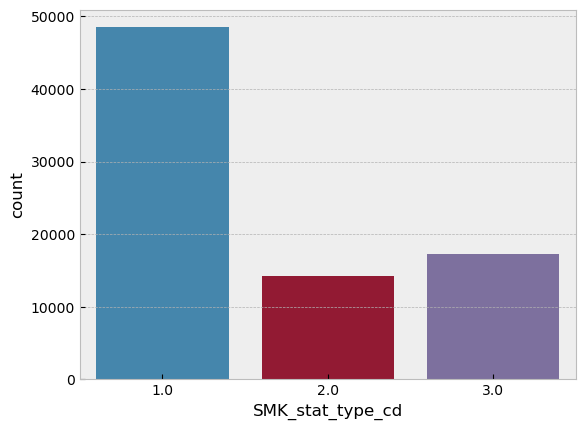

In [9]:
plt.figure()
sns.countplot(data = df_salud,
              x = 'SMK_stat_type_cd')

PROMEDIO DE PESO SEGUN SEXO

<Axes: xlabel='sex', ylabel='weight'>

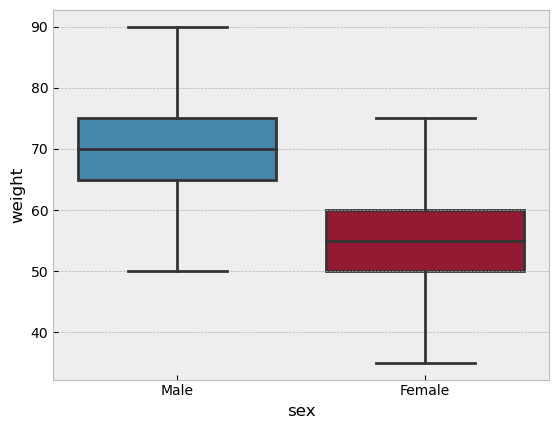

In [10]:
plt.figure()
sns.boxplot(data = df_salud,
            x = 'sex',
            y = 'weight', 
            showfliers = False)

MOSTRANDO COMO SE DISTRIBUYE EL PESO ENTRE LA POBLACION DE LA MUESTRA

<Axes: xlabel='weight', ylabel='Count'>

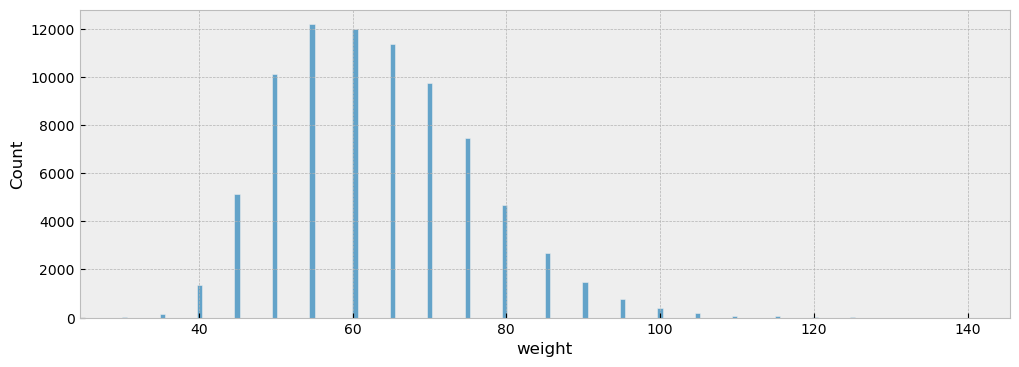

In [14]:
plt.figure(figsize = (12,4))
sns.histplot(data = df_salud,
                x = 'weight')

DISTRIBUCION DE PERSONAS DE LA MUESTRA QUE INGIEREN ALCOHOL

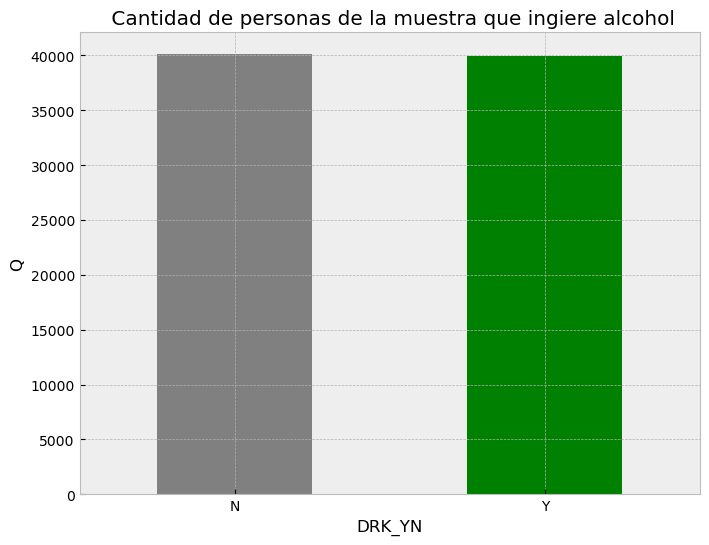

In [15]:
plt.figure(figsize=(8, 6))
plt.title(" Cantidad de personas de la muestra que ingiere alcohol")
df_salud["DRK_YN"].value_counts().plot(kind="bar", color=["gray", "green"])
plt.xlabel("DRK_YN")
plt.ylabel("Q")
plt.xticks(rotation=0)  # permite poner horizontal los nombres de las columnas
plt.show()

DISTRIBUCION DE LA EDAD DE LA MUESTRA

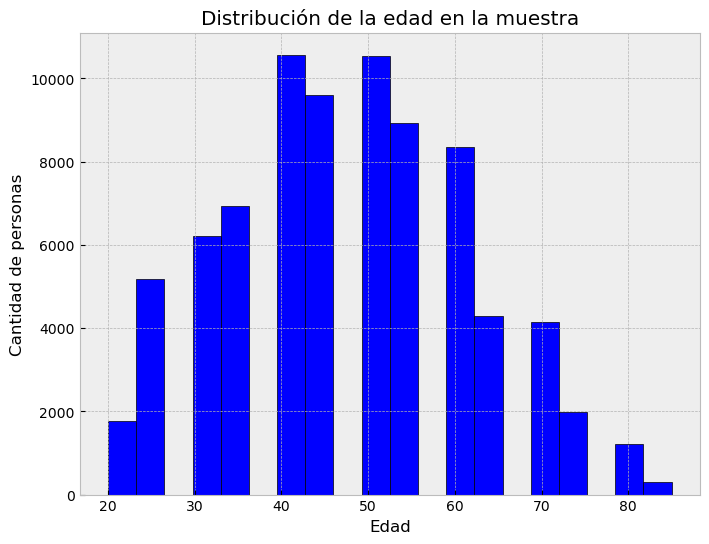

In [16]:
# Gráfico 2: Distribución de la edad en la muestra
plt.figure(figsize=(8, 6))
plt.title("Distribución de la edad en la muestra")
plt.hist(df_salud["age"], bins=20, color="blue", edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.show()

PESO DE LAS PERSONAS SEGUN EL CONSUMO DE CIGARRILLO

<Axes: xlabel='SMK_stat_type_cd', ylabel='weight'>

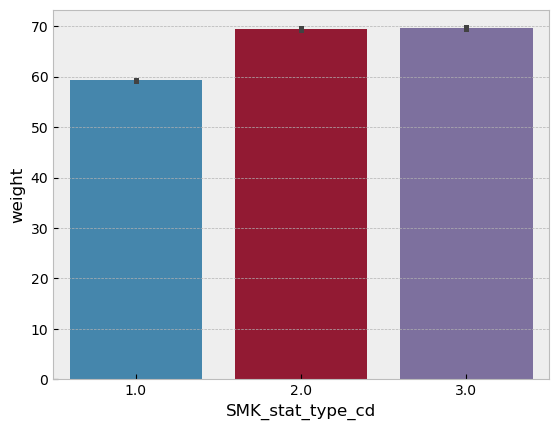

In [17]:
plt.figure()
sns.barplot(data = df_salud,
           x = 'SMK_stat_type_cd',
           y = 'weight')


In [12]:
#Peso promedio segun el sexo - GROUP BY

agrupacion_peso = df_salud.groupby('sex')['weight'].mean()
print(agrupacion_peso)


sex
Female    55.517939
Male      70.133641
Name: weight, dtype: float64


¿QUE CORRELACION TIENE EL INCREMENTO DEL COLESTEROL CON EL INCREMENTO CORPORAL DEL LDL?

In [13]:
correlacion = df_salud['LDL_chole'].corr(df_salud['tot_chole'])
print(correlacion)

0.8436398571753619


In [14]:
# Matriz de correlacion
df_salud[['LDL_chole','tot_chole','HDL_chole','triglyceride']].corr(method='pearson')


,LDL_chole,tot_chole,HDL_chole,triglyceride
LDL_chole,1.000000,0.843640,0.384584,0.148429
tot_chole,0.843640,1.000000,0.197280,0.290711
HDL_chole,0.384584,0.197280,1.000000,0.112653
triglyceride,0.148429,0.290711,0.112653,1.000000


In [15]:
# Primero: Calculo percentil 95 de la variable que muestra altos valores extremos
percentil_95_coles = df_salud['LDL_chole'].quantile(0.95)
print(percentil_95_coles)

172.0


<Axes: xlabel='LDL_chole', ylabel='tot_chole'>

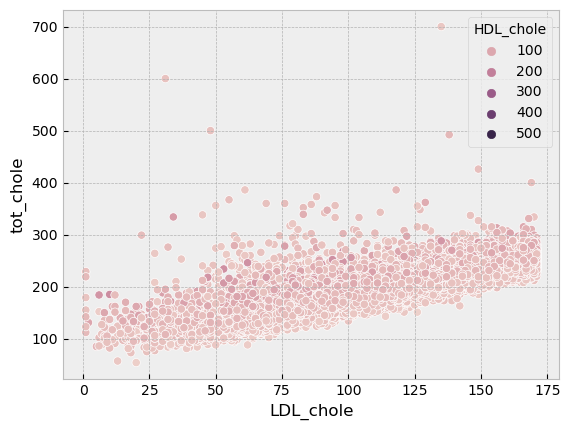

In [16]:
# Hago el gráfico filtrando el df para quedarme con los registros con valores menores al percentil 95
plt.figure()
sns.scatterplot(data = df_salud[(df_salud['LDL_chole'] < percentil_95_coles)],
                x = 'LDL_chole',
                y = 'tot_chole',
                hue = 'HDL_chole')


EN EL GRAFICO PODEMOS OBSERVAR LA RELACION QUE TIENE EL INCREMENTO DEL LDL (colesterol malo), CON EL INCREMENTO DEL VALOR DEL COLESTEROL TOTAL.

MI HIPOTESIS ES QUE TODOS LAS PERSONAS QUE CONSUMEN CIGARRILLOS E INGIEREN ALCOHOL TIENEN TENDENCIA AL AUMENTO DEL COLESTEROL CON LA INGERENCIA QUE ESTO TIENE EN EL DETERIORO DE LA FUNCION CORONARIA.  PARA COMPROBAR ESTO DEBERIA SUMAR INFORMACION DE CUALES SON LOS VALORES NORMALES DE CADA VARIABLE, VER QUE CANTIDAD ESTA POR SOBRE LOS VALORES MEDICAMENTE INDICADOS COMO NORMALES Y OBTENER UN PRCENTAJE DE CUALES DE ELLOS SON FUMADORES Y CONSUMIDORES DE ALCOHOL. ¿CUANTAS PERSONAS DE LA MUESTRA ESTAN POR DUERA DE LOS VALORES NORMALES? ¿CUANTOS DE ELLOS FUMAN Y CUANTOS NO?¿CUANTOS DE ELLOS BEBEN Y CUANTOS NO? ¿QUE RELACION TIENE EL CONSUMO DE ESTA SUSTANCIA CON EL EXCESO DE PESO? SUMANDO INFORMACION AL DATASET ESPERO PREDECIR QUE PORCENTAJE DE ESTAS PERSONAS TIENEN MAS POSIBILIDADES DE SUFRIR UN INFARTO. 